In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [35]:
ganyan = pd.read_excel("project_data.xlsx")

In [4]:
ganyan

,Unnamed: 0,Date,city,race_n_time,ID,Racer,Racer_1,LAST_RACER_SAME_AS_CURRENT_RACER,LAST_RACER_SAME_AS_CURRENT_RACER_BINARY,Yas,...,IKINCILIK_PERCENTAGE,UCUNCULUK_PERCENTAGE,DORDUNCULUK_PERCENTAGE,SPEED_LATEST_1ST,SPEED_LATEST_2nd,SPEED_LATEST_3rd,SPEED_LATEST_4th,SPEED_LATEST_5th,RANK.1,Ranking_Score_Normalized.1
0,511,08/07/2015,Elazığ,8. Koşu:18:00,ENGİNYAR(12) KG SK,S.KAPLAN,S.KAPLAN,True,1,4y a a,...,8,0,17,11.427846,10.886131,11.464023,10.979962,9.382513,8,46
1,531,29/07/2015,Elazığ,8. Koşu:18:00,TÜRK LOKUMU(8) KG,R.YILDIRIM,R.YILDIRIM,True,1,4y a k,...,4,9,18,10.127487,13.877645,13.452484,13.588275,13.971359,13,7
2,560,29/07/2015,Elazığ,6. Koşu:17:00,KINGDOM(6) KG K,C.TEPE,C.TEPE,True,1,7y d a,...,10,16,8,13.525394,14.896787,13.979171,14.004570,13.728720,7,53
3,601,21/07/2015,Ankara,8. Koşu:17:30,ŞAHDİLDAR(10) KG K,MÜS.ÇELİK,MÜS.ÇELİK,True,1,2y d d,...,0,0,0,16.070711,NaN,NaN,NaN,NaN,7,39
4,618,21/07/2015,Ankara,8. Koşu:17:30,DEHERE VERE(8) SKG SK,E.METİN,E.METİN,True,1,2y a d,...,0,100,0,16.224986,NaN,NaN,NaN,NaN,3,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12354,353134,30/12/2019,Bursa,1. Koşu:13:30,ADAMINDİBİ(1) KG SK,E.ERGÜR,F.ARSLAN,False,0,3y a e,...,0,0,0,NaN,12.675419,12.289658,13.766204,NaN,8,53
12355,353139,29/12/2019,Adana,2. Koşu:18:30,KUBİ DAYI(10) KG DB SK,T.BALİ,M.ÖZDEMİR,False,0,5y a a,...,12,4,9,NaN,NaN,15.212596,NaN,NaN,6,54
12356,353215,30/12/2019,Şanlıurfa,2. Koşu:18:30,KING OF DIAMONDS(13) DB SK,R.DOĞAN,R.DOĞAN,True,1,4y d a,...,5,17,14,13.305835,13.765124,14.722976,14.742396,15.053943,12,26
12357,353233,30/12/2019,Şanlıurfa,1. Koşu:18:00,BEY POYRAZ(2) SK,İ.AKYAVUZ,İ.AKYAVUZ,True,1,2y d e,...,0,0,50,13.722799,12.976642,14.196143,15.164918,14.942099,10,40


In [14]:
ganyan.head().transpose()

,0,1,2,3,4
Unnamed: 0,511,531,560,601,618
Date,08/07/2015,29/07/2015,29/07/2015,21/07/2015,21/07/2015
city,Elazığ,Elazığ,Elazığ,Ankara,Ankara
race_n_time,8. Koşu:18:00,8. Koşu:18:00,6. Koşu:17:00,8. Koşu:17:30,8. Koşu:17:30
ID,ENGİNYAR(12) KG SK,TÜRK LOKUMU(8) KG,KINGDOM(6) KG K,ŞAHDİLDAR(10) KG K,DEHERE VERE(8) SKG SK
Racer,S.KAPLAN,R.YILDIRIM,C.TEPE,MÜS.ÇELİK,E.METİN
Racer_1,S.KAPLAN,R.YILDIRIM,C.TEPE,MÜS.ÇELİK,E.METİN
LAST_RACER_SAME_AS_CURRENT_RACER,True,True,True,True,True
LAST_RACER_SAME_AS_CURRENT_RACER_BINARY,1,1,1,1,1
Yas,4y a a,4y a k,7y d a,2y d d,2y a d


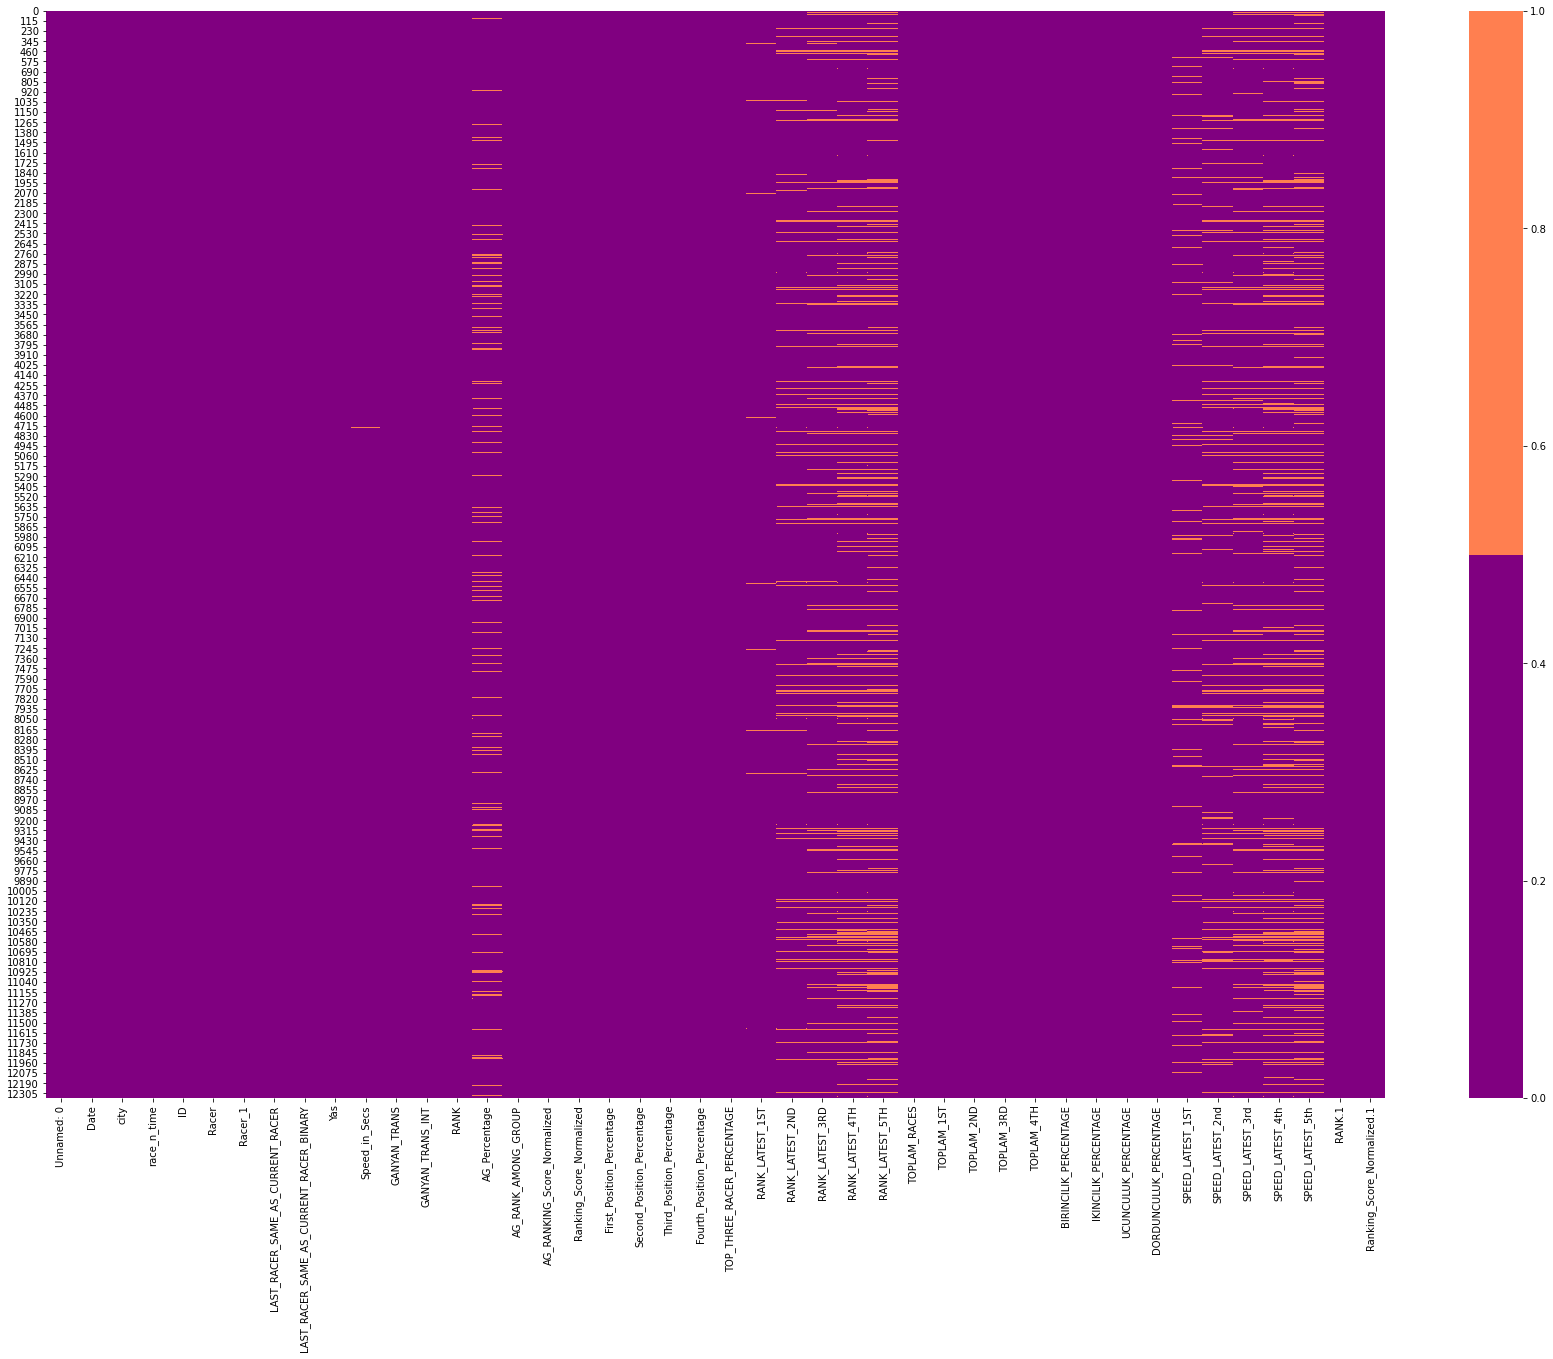

In [13]:
cols = ganyan.columns[:] # first 30 columns

colours = ['purple', 'coral'] # specify the colours - yellow is missing. blue is not missing

plt.subplots(figsize=(30,20))
sns.heatmap(ganyan[cols].isnull(), cmap=sns.color_palette(colours))

In [15]:
ganyan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12359 entries, 0 to 12358
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               12359 non-null  int64  
 1   Date                                     12359 non-null  object 
 2   city                                     12359 non-null  object 
 3   race_n_time                              12359 non-null  object 
 4   ID                                       12359 non-null  object 
 5   Racer                                    12359 non-null  object 
 6   Racer_1                                  12359 non-null  object 
 7   LAST_RACER_SAME_AS_CURRENT_RACER         12359 non-null  bool   
 8   LAST_RACER_SAME_AS_CURRENT_RACER_BINARY  12359 non-null  int64  
 9   Yas                                      12359 non-null  object 
 10  Speed_in_Secs                            12354

In [18]:
ganyan["Racer"].value_counts()

KEMAL KURT         253
E.KILIK            136
N.AVCİ             134
H.DEMİRTAŞ         131
M.AVŞAR            121
                  ... 
M.H.TELMAN           1
HİKMET TUNÇ          1
J.EGAN               1
İLQAR MUSEYİBOV      1
E.ERGÜR              1
Name: Racer, Length: 456, dtype: int64

In [20]:
jokey = ganyan["Racer_1"].value_counts()

In [33]:
jokey.index[0] 
jokey.values()

TypeError: 'numpy.ndarray' object is not callable

In [22]:
ganyan["race_n_time"].value_counts()

7. Koşu:21:00    424
4. Koşu:19:30    370
3. Koşu:19:00    370
3. Koşu:19:30    329
8. Koşu:21:30    300
                ... 
4. Koşu:13:30      1
5. Koşu:14:15      1
6. Koşu:14:30      1
5. Koşu:20:15      1
1. Koşu:19:15      1
Name: race_n_time, Length: 186, dtype: int64

In [38]:

for i in range(0,len(jokey)):
    print(jokey.index[i]+ ": " + str(jokey[i]))
#     print(":")
#     print(jokey[i])

KEMAL KURT: 252
E.KILIK: 134
N.AVCİ: 134
M.AVŞAR: 127
A.KAÇMAZ: 122
H.ÇİZİK: 122
H.PARILDAR: 120
H.DEMİRTAŞ: 119
M.ÇİÇEK: 114
N.ALTIN: 113
MÜS.ÇELİK: 111
F.YÜKSEL: 111
O.YILDIZ: 110
R.YILDIRIM: 109
M.KESKİN: 109
M.DOĞAN: 104
İ.AKYAVUZ: 102
A.KURŞUN: 99
T.YILDIZ: 98
H.POLAT: 97
B.AVERBAK: 96
S.ÖZEN: 95
A.ASLAN: 95
F.YARDIMCI: 95
S.ERKUŞ: 94
GÖKH.GÖKÇE: 93
E.SİNCAN: 92
A.SÖZEN: 89
R.DOĞAN: 87
G.KOCAKAYA: 86
H.ŞİMŞEK: 86
D.YILDIZ: 83
A.C.DAĞDEVİREN: 83
M.P.DEMİR: 82
G.YILDIZ: 82
CEM ŞEN: 82
E.AKKILIÇ: 81
E.TUNÇ: 80
M.BAYDAN: 77
M.B.ÇAKMAK: 76
S.KAPLAN: 76
Ö.YILDIRIM: 75
İ.KATI: 75
C.TEPE: 73
A.ÇELİK: 73
D.AYDOĞAN: 71
V.KIZMAZ: 70
M.A.SOLMAZ: 70
M.IŞIK: 70
MAHMUT TURAN: 69
H.ALTUNKILIÇ: 69
Z.KARABULUT: 68
BURAK AKÇAY: 67
N.ŞEN: 67
DOĞUKAN SAV: 66
H.KARATAŞ: 66
MUH.OK: 66
T.YILMAZ: 66
F.FELHAN: 65
H.ŞANLI: 65
M.F.ASLAN: 64
M.KAYA: 64
M.ÜNLÜ: 64
H.BUDAK: 64
M.E.DOĞAN: 64
B.KILINÇ: 64
F.HİM: 63
M.HAMEDİ: 63
M.GÖNÜLTAŞ: 63
V.YÜCEL: 62
D.PALAUR: 62
H.SARIDAL: 62
A.CAN İŞLEYEN: 61
GÖK.BEKTAŞ: 61

In [62]:
kosu=[]
kosu_saati=[]


for yarıs in ganyan["race_n_time"]:
    if ((yarıs[:2]) == 10 or (yarıs[:2]) == "10"):
        kosu.append(yarıs[:2])
        kosu_saati.append(yarıs[-5:])
    else:
        kosu.append(yarıs[0])
        kosu_saati.append(yarıs[-5:])

In [63]:
kosu

['8',
 '8',
 '6',
 '8',
 '8',
 '10',
 '6',
 '8',
 '4',
 '6',
 '9',
 '3',
 '6',
 '7',
 '3',
 '2',
 '2',
 '1',
 '1',
 '1',
 '5',
 '5',
 '1',
 '1',
 '5',
 '8',
 '8',
 '7',
 '3',
 '6',
 '6',
 '6',
 '6',
 '2',
 '2',
 '2',
 '5',
 '7',
 '1',
 '9',
 '9',
 '9',
 '8',
 '5',
 '3',
 '3',
 '3',
 '2',
 '1',
 '5',
 '3',
 '7',
 '7',
 '5',
 '5',
 '5',
 '5',
 '3',
 '1',
 '7',
 '8',
 '8',
 '7',
 '6',
 '6',
 '7',
 '6',
 '6',
 '4',
 '5',
 '5',
 '5',
 '5',
 '4',
 '4',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '3',
 '4',
 '3',
 '2',
 '2',
 '3',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '7',
 '8',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '5',
 '5',
 '4',
 '4',
 '4',
 '3',
 '3',
 '3',
 '2',
 '2',
 '1',
 '8',
 '8',
 '8',
 '9',
 '7',
 '9',
 '7',
 '7',
 '8',
 '9',
 '7',
 '6',
 '6',
 '6',
 '7',
 '7',
 '5',
 '7',
 '5',
 '5',
 '7',
 '7',
 '6',
 '6',
 '5',
 '5',
 '3',
 '4',
 '4',
 '3',
 '3',
 '4',
 '4',
 '4',
 '2',
 '2',
 '4',
 '2',
 '3',
 '2',
 '3',
 '3',
 '3',
 '2',
 '1',
 '9',
 '9',
 '9',
 '9',
 '6',
 '6',
 '9

In [57]:
kosu_saati

['18:00',
 '18:00',
 '17:00',
 '17:30',
 '17:30',
 '18:00',
 '17:00',
 '21:30',
 '20:00',
 '17:30',
 '21:30',
 '19:30',
 '17:00',
 '20:30',
 '15:30',
 '15:00',
 '15:30',
 '14:30',
 '14:30',
 '15:00',
 '19:30',
 '19:30',
 '18:30',
 '13:30',
 '20:30',
 '17:30',
 '17:00',
 '16:30',
 '19:30',
 '16:00',
 '16:00',
 '16:00',
 '16:00',
 '19:00',
 '19:00',
 '19:00',
 '16:00',
 '21:30',
 '18:30',
 '21:30',
 '21:30',
 '21:30',
 '21:00',
 '20:30',
 '14:30',
 '14:30',
 '19:30',
 '14:00',
 '17:45',
 '19:30',
 '18:30',
 '17:00',
 '17:00',
 '16:00',
 '16:00',
 '16:00',
 '19:00',
 '17:45',
 '17:15',
 '21:30',
 '18:00',
 '18:00',
 '21:30',
 '20:30',
 '21:00',
 '18:00',
 '21:00',
 '21:00',
 '20:00',
 '19:30',
 '20:00',
 '19:30',
 '17:00',
 '20:00',
 '16:00',
 '19:00',
 '19:30',
 '15:30',
 '15:30',
 '19:30',
 '19:30',
 '19:30',
 '19:30',
 '19:00',
 '15:30',
 '19:00',
 '17:45',
 '15:00',
 '19:00',
 '19:00',
 '19:00',
 '18:30',
 '18:30',
 '14:30',
 '14:30',
 '14:30',
 '21:30',
 '21:00',
 '18:00',
 '18:00',


In [41]:
for yarıs in ganyan["race_n_time"]:
    print(yarıs)

8. Koşu:18:00
8. Koşu:18:00
6. Koşu:17:00
8. Koşu:17:30
8. Koşu:17:30
10. Koşu:18:00
6. Koşu:17:00
8. Koşu:21:30
4. Koşu:20:00
6. Koşu:17:30
9. Koşu:21:30
3. Koşu:19:30
6. Koşu:17:00
7. Koşu:20:30
3. Koşu:15:30
2. Koşu:15:00
2. Koşu:15:30
1. Koşu:14:30
1. Koşu:14:30
1. Koşu:15:00
5. Koşu:19:30
5. Koşu:19:30
1. Koşu:18:30
1. Koşu:13:30
5. Koşu:20:30
8. Koşu:17:30
8. Koşu:17:00
7. Koşu:16:30
3. Koşu:19:30
6. Koşu:16:00
6. Koşu:16:00
6. Koşu:16:00
6. Koşu:16:00
2. Koşu:19:00
2. Koşu:19:00
2. Koşu:19:00
5. Koşu:16:00
7. Koşu:21:30
1. Koşu:18:30
9. Koşu:21:30
9. Koşu:21:30
9. Koşu:21:30
8. Koşu:21:00
5. Koşu:20:30
3. Koşu:14:30
3. Koşu:14:30
3. Koşu:19:30
2. Koşu:14:00
1. Koşu:17:45
5. Koşu:19:30
3. Koşu:18:30
7. Koşu:17:00
7. Koşu:17:00
5. Koşu:16:00
5. Koşu:16:00
5. Koşu:16:00
5. Koşu:19:00
3. Koşu:17:45
1. Koşu:17:15
7. Koşu:21:30
8. Koşu:18:00
8. Koşu:18:00
7. Koşu:21:30
6. Koşu:20:30
6. Koşu:21:00
7. Koşu:18:00
6. Koşu:21:00
6. Koşu:21:00
4. Koşu:20:00
5. Koşu:19:30
5. Koşu:20:00
5. Ko

3. Koşu:13:45
2. Koşu:13:15
2. Koşu:17:30
1. Koşu:11:45
1. Koşu:12:45
1. Koşu:17:00
8. Koşu:21:00
8. Koşu:21:00
3. Koşu:15:00
8. Koşu:21:00
1. Koşu:14:00
7. Koşu:20:30
6. Koşu:20:00
1. Koşu:17:15
7. Koşu:20:30
8. Koşu:17:30
5. Koşu:19:30
5. Koşu:19:30
5. Koşu:19:30
8. Koşu:17:30
5. Koşu:19:30
3. Koşu:18:30
3. Koşu:18:30
4. Koşu:15:30
9. Koşu:21:00
1. Koşu:17:15
2. Koşu:18:00
2. Koşu:14:30
8. Koşu:21:00
6. Koşu:20:00
9. Koşu:21:00
7. Koşu:20:00
8. Koşu:20:30
4. Koşu:18:30
4. Koşu:18:30
2. Koşu:17:30
1. Koşu:17:00
7. Koşu:17:00
4. Koşu:15:30
4. Koşu:15:30
1. Koşu:14:00
4. Koşu:14:30
1. Koşu:17:15
9. Koşu:16:00
7. Koşu:15:00
9. Koşu:16:00
9. Koşu:16:00
8. Koşu:17:30
7. Koşu:15:00
7. Koşu:15:00
5. Koşu:19:30
4. Koşu:19:00
1. Koşu:12:00
4. Koşu:19:00
3. Koşu:18:30
2. Koşu:18:00
7. Koşu:17:00
4. Koşu:18:30
1. Koşu:14:00
1. Koşu:14:00
7. Koşu:17:00
8. Koşu:16:00
5. Koşu:14:30
4. Koşu:14:00
5. Koşu:14:30
7. Koşu:21:00
8. Koşu:15:45
8. Koşu:15:45
7. Koşu:20:30
8. Koşu:15:45
8. Koşu:15:45
3. Koş

2. Koşu:15:30
6. Koşu:16:30
2. Koşu:18:00
5. Koşu:16:00
5. Koşu:17:00
3. Koşu:16:00
2. Koşu:19:30
2. Koşu:19:30
1. Koşu:19:00
1. Koşu:19:00
1. Koşu:15:00
1. Koşu:18:30
2. Koşu:19:00
4. Koşu:20:00
4. Koşu:17:00
5. Koşu:17:30
2. Koşu:19:00
9. Koşu:18:00
2. Koşu:15:30
9. Koşu:21:30
6. Koşu:18:00
6. Koşu:18:00
9. Koşu:18:00
9. Koşu:18:00
9. Koşu:18:00
9. Koşu:18:00
8. Koşu:17:30
8. Koşu:17:30
6. Koşu:16:30
5. Koşu:16:00
4. Koşu:15:30
2. Koşu:14:30
5. Koşu:17:30
4. Koşu:16:00
6. Koşu:20:00
4. Koşu:16:00
4. Koşu:16:00
3. Koşu:18:30
2. Koşu:19:30
2. Koşu:19:30
1. Koşu:18:00
2. Koşu:18:30
7. Koşu:17:30
5. Koşu:19:00
5. Koşu:19:00
4. Koşu:18:30
7. Koşu:20:30
2. Koşu:19:30
8. Koşu:21:00
8. Koşu:21:00
2. Koşu:19:30
2. Koşu:15:00
3. Koşu:15:30
8. Koşu:21:00
6. Koşu:20:00
4. Koşu:19:00
6. Koşu:17:00
3. Koşu:18:30
3. Koşu:15:30
4. Koşu:16:00
2. Koşu:17:45
8. Koşu:21:00
8. Koşu:21:00
9. Koşu:21:30
7. Koşu:18:00
7. Koşu:18:00
6. Koşu:17:30
6. Koşu:17:30
8. Koşu:21:30
7. Koşu:21:00
6. Koşu:17:30
4. Koş

9. Koşu:21:00
4. Koşu:14:30
5. Koşu:19:00
5. Koşu:19:00
5. Koşu:19:00
6. Koşu:17:30
5. Koşu:17:00
5. Koşu:17:00
9. Koşu:17:30
6. Koşu:16:00
2. Koşu:15:30
1. Koşu:15:00
1. Koşu:15:00
3. Koşu:14:30
1. Koşu:13:30
9. Koşu:17:00
9. Koşu:21:00
9. Koşu:17:00
5. Koşu:19:00
5. Koşu:19:00
5. Koşu:19:00
4. Koşu:18:30
5. Koşu:15:00
1. Koşu:16:45
8. Koşu:16:30
8. Koşu:16:30
7. Koşu:17:30
8. Koşu:16:30
7. Koşu:16:00
6. Koşu:15:30
4. Koşu:16:00
4. Koşu:16:00
5. Koşu:15:00
1. Koşu:13:00
5. Koşu:15:00
7. Koşu:21:00
5. Koşu:15:00
3. Koşu:14:00
9. Koşu:21:00
5. Koşu:20:00
6. Koşu:20:30
3. Koşu:19:00
1. Koşu:18:00
9. Koşu:21:00
9. Koşu:21:00
5. Koşu:19:00
2. Koşu:17:15
8. Koşu:21:00
9. Koşu:21:00
9. Koşu:17:30
8. Koşu:20:30
7. Koşu:17:30
6. Koşu:20:00
4. Koşu:15:30
6. Koşu:19:30
6. Koşu:19:30
5. Koşu:16:30
4. Koşu:19:00
5. Koşu:19:00
3. Koşu:15:00
3. Koşu:15:00
3. Koşu:15:00
3. Koşu:18:30
3. Koşu:18:30
3. Koşu:15:30
4. Koşu:18:30
4. Koşu:18:30
6. Koşu:17:00
6. Koşu:17:00
6. Koşu:17:00
3. Koşu:18:00
4. Koş

3. Koşu:19:30
2. Koşu:19:00
2. Koşu:19:00
8. Koşu:21:30
8. Koşu:21:30
6. Koşu:20:30
7. Koşu:18:00
5. Koşu:20:00
4. Koşu:19:30
4. Koşu:19:30
4. Koşu:19:30
4. Koşu:19:30
4. Koşu:19:30
2. Koşu:15:30
4. Koşu:19:30
4. Koşu:19:30
2. Koşu:15:30
2. Koşu:15:30
7. Koşu:18:00
7. Koşu:18:00
7. Koşu:21:00
7. Koşu:21:00
3. Koşu:19:30
5. Koşu:20:00
4. Koşu:19:30
4. Koşu:19:30
2. Koşu:15:00
2. Koşu:18:30
3. Koşu:16:30
2. Koşu:15:30
3. Koşu:19:30
2. Koşu:15:30
3. Koşu:19:30
1. Koşu:15:00
3. Koşu:19:30
6. Koşu:21:30
6. Koşu:21:30
6. Koşu:21:30
2. Koşu:19:30
4. Koşu:19:30
3. Koşu:16:00
6. Koşu:16:30
6. Koşu:16:30
7. Koşu:22:00
9. Koşu:21:30
1. Koşu:14:00
6. Koşu:18:00
2. Koşu:19:15
1. Koşu:18:45
9. Koşu:18:00
2. Koşu:16:00
5. Koşu:19:30
5. Koşu:17:00
5. Koşu:20:30
3. Koşu:19:30
3. Koşu:19:30
2. Koşu:19:00
2. Koşu:15:30
7. Koşu:21:30
4. Koşu:15:30
8. Koşu:21:30
3. Koşu:16:30
8. Koşu:21:30
7. Koşu:18:00
9. Koşu:22:00
7. Koşu:21:00
5. Koşu:20:00
6. Koşu:19:30
7. Koşu:18:00
5. Koşu:17:00
3. Koşu:18:00
7. Koş

4. Koşu:15:30
5. Koşu:19:30
4. Koşu:16:00
4. Koşu:15:30
4. Koşu:19:00
5. Koşu:19:30
4. Koşu:19:00
4. Koşu:19:00
3. Koşu:15:00
4. Koşu:19:00
3. Koşu:15:00
3. Koşu:15:00
3. Koşu:15:30
3. Koşu:18:30
2. Koşu:15:00
2. Koşu:15:00
2. Koşu:18:00
2. Koşu:15:00
1. Koşu:14:30
1. Koşu:13:30
1. Koşu:17:15
8. Koşu:21:00
1. Koşu:17:15
8. Koşu:21:00
8. Koşu:21:00
7. Koşu:17:00
7. Koşu:17:30
5. Koşu:16:00
6. Koşu:20:00
6. Koşu:16:30
6. Koşu:17:00
5. Koşu:16:00
5. Koşu:16:00
6. Koşu:20:00
4. Koşu:15:30
4. Koşu:15:30
4. Koşu:19:30
3. Koşu:15:30
4. Koşu:19:30
3. Koşu:15:00
4. Koşu:19:00
3. Koşu:18:30
1. Koşu:14:30
1. Koşu:14:00
5. Koşu:15:00
8. Koşu:17:30
8. Koşu:17:30
8. Koşu:17:30
6. Koşu:16:30
5. Koşu:16:00
6. Koşu:16:30
4. Koşu:15:30
2. Koşu:14:30
2. Koşu:14:30
1. Koşu:14:00
1. Koşu:14:00
8. Koşu:21:00
8. Koşu:21:00
7. Koşu:20:30
6. Koşu:20:00
5. Koşu:19:30
4. Koşu:19:00
4. Koşu:19:00
1. Koşu:13:30
1. Koşu:17:15
1. Koşu:17:15
4. Koşu:19:00
9. Koşu:21:00
9. Koşu:21:00
8. Koşu:17:00
7. Koşu:20:00
8. Koş

3. Koşu:16:30
7. Koşu:21:30
7. Koşu:21:30
7. Koşu:21:30
4. Koşu:20:00
6. Koşu:21:00
7. Koşu:21:30
2. Koşu:19:00
4. Koşu:20:00
4. Koşu:16:30
2. Koşu:15:30
3. Koşu:16:00
2. Koşu:19:00
1. Koşu:18:00
1. Koşu:18:00
3. Koşu:19:30
3. Koşu:19:30
2. Koşu:19:00
1. Koşu:18:30
1. Koşu:18:30
2. Koşu:16:00
4. Koşu:20:00
1. Koşu:18:30
1. Koşu:18:30
3. Koşu:16:30
2. Koşu:16:00
6. Koşu:18:00
3. Koşu:16:30
3. Koşu:16:30
3. Koşu:16:30
5. Koşu:17:00
7. Koşu:21:30
1. Koşu:15:00
7. Koşu:21:30
1. Koşu:15:00
2. Koşu:19:00
3. Koşu:20:00
3. Koşu:20:00
3. Koşu:20:00
2. Koşu:19:00
1. Koşu:15:30
7. Koşu:21:30
7. Koşu:21:30
6. Koşu:17:30
5. Koşu:20:30
2. Koşu:19:00
1. Koşu:18:30
3. Koşu:19:30
6. Koşu:21:30
7. Koşu:18:00
2. Koşu:19:00
4. Koşu:16:30
6. Koşu:17:30
4. Koşu:16:30
1. Koşu:18:00
3. Koşu:16:00
5. Koşu:17:00
4. Koşu:16:30
7. Koşu:21:30
5. Koşu:20:30
1. Koşu:18:00
3. Koşu:16:00
2. Koşu:19:30
1. Koşu:18:00
1. Koşu:18:00
1. Koşu:18:00
3. Koşu:19:30
6. Koşu:21:00
7. Koşu:21:30
7. Koşu:21:30
6. Koşu:21:00
7. Koş

1. Koşu:17:45
1. Koşu:17:15
7. Koşu:21:30
7. Koşu:21:30
8. Koşu:21:30
7. Koşu:21:30
7. Koşu:21:30
8. Koşu:21:30
8. Koşu:18:00
8. Koşu:18:00
8. Koşu:21:30
8. Koşu:18:00
8. Koşu:21:30
6. Koşu:21:00
8. Koşu:18:00
8. Koşu:18:00
8. Koşu:18:00
6. Koşu:21:00
7. Koşu:21:00
7. Koşu:18:00
6. Koşu:21:00
7. Koşu:17:30
7. Koşu:18:00
7. Koşu:17:30
7. Koşu:18:00
4. Koşu:19:30
4. Koşu:16:00
4. Koşu:16:00
4. Koşu:19:30
4. Koşu:16:00
4. Koşu:19:30
3. Koşu:19:30
3. Koşu:15:30
3. Koşu:15:30
2. Koşu:15:00
3. Koşu:15:30
3. Koşu:15:30
3. Koşu:15:30
1. Koşu:18:30
2. Koşu:18:30
8. Koşu:21:30
2. Koşu:15:30
1. Koşu:15:00
8. Koşu:21:30
7. Koşu:21:30
7. Koşu:21:30
8. Koşu:17:30
7. Koşu:21:30
9. Koşu:18:00
7. Koşu:17:00
7. Koşu:21:30
6. Koşu:21:30
4. Koşu:20:00
6. Koşu:21:30
6. Koşu:21:30
8. Koşu:17:30
5. Koşu:20:30
3. Koşu:19:30
3. Koşu:19:30
3. Koşu:19:30
5. Koşu:16:30
3. Koşu:15:00
4. Koşu:16:00
4. Koşu:20:00
2. Koşu:19:00
3. Koşu:19:30
3. Koşu:19:30
3. Koşu:19:30
3. Koşu:19:30
3. Koşu:19:30
2. Koşu:14:30
2. Koş

7. Koşu:17:30
7. Koşu:17:30
7. Koşu:21:00
7. Koşu:21:00
7. Koşu:21:00
6. Koşu:20:30
6. Koşu:20:30
6. Koşu:17:00
3. Koşu:15:30
3. Koşu:15:30
3. Koşu:15:30
2. Koşu:15:00
3. Koşu:19:00
2. Koşu:15:00
3. Koşu:15:30
2. Koşu:15:00
1. Koşu:18:00
2. Koşu:18:30
7. Koşu:17:00
8. Koşu:17:30
6. Koşu:20:30
6. Koşu:20:30
7. Koşu:21:00
6. Koşu:20:30
7. Koşu:21:00
7. Koşu:21:00
7. Koşu:21:00
5. Koşu:20:00
8. Koşu:17:30
7. Koşu:21:00
5. Koşu:20:00
6. Koşu:16:30
6. Koşu:16:30
7. Koşu:21:00
7. Koşu:21:00
6. Koşu:17:00
5. Koşu:20:00
4. Koşu:19:30
4. Koşu:15:30
5. Koşu:16:30
3. Koşu:19:00
3. Koşu:19:00
3. Koşu:19:00
3. Koşu:15:00
3. Koşu:15:00
3. Koşu:19:00
2. Koşu:14:30
2. Koşu:18:30
1. Koşu:18:00
1. Koşu:18:00
1. Koşu:14:00
1. Koşu:18:00
1. Koşu:18:00
6. Koşu:19:30
6. Koşu:16:00
3. Koşu:18:00
8. Koşu:20:30
8. Koşu:20:30
8. Koşu:20:30
6. Koşu:21:00
8. Koşu:20:30
6. Koşu:19:30
5. Koşu:19:00
8. Koşu:19:30
5. Koşu:20:30
6. Koşu:22:00
3. Koşu:19:30
1. Koşu:16:45
5. Koşu:21:30
1. Koşu:16:45
4. Koşu:21:00
4. Koş

5. Koşu:19:30
5. Koşu:19:30
3. Koşu:18:30
5. Koşu:19:30
3. Koşu:18:30
3. Koşu:18:30
10. Koşu:18:00
10. Koşu:18:00
8. Koşu:17:00
7. Koşu:16:30
7. Koşu:21:30
6. Koşu:21:00
3. Koşu:19:30
2. Koşu:17:45
1. Koşu:18:30
1. Koşu:18:30
2. Koşu:17:45
2. Koşu:17:45
3. Koşu:18:30
9. Koşu:17:30
6. Koşu:20:00
7. Koşu:20:30
4. Koşu:19:00
9. Koşu:21:30
9. Koşu:18:00
9. Koşu:18:00
9. Koşu:18:00
8. Koşu:18:00
8. Koşu:21:30
7. Koşu:21:00
6. Koşu:16:30
6. Koşu:21:00
7. Koşu:21:00
6. Koşu:21:00
6. Koşu:16:30
6. Koşu:16:30
8. Koşu:17:15
5. Koşu:16:00
7. Koşu:22:00
7. Koşu:22:00
4. Koşu:20:00
7. Koşu:21:30
6. Koşu:21:30
6. Koşu:21:30
6. Koşu:21:30
7. Koşu:21:30
6. Koşu:21:30
4. Koşu:19:30
4. Koşu:20:30
2. Koşu:15:00
2. Koşu:19:00
2. Koşu:19:00
3. Koşu:20:00
7. Koşu:18:00
3. Koşu:20:00
3. Koşu:19:00
1. Koşu:14:30
5. Koşu:20:30
2. Koşu:19:30
1. Koşu:18:30
2. Koşu:19:30
2. Koşu:18:30
2. Koşu:18:30
2. Koşu:18:30
3. Koşu:14:30
8. Koşu:18:00
1. Koşu:17:45
3. Koşu:19:30
4. Koşu:16:00
9. Koşu:21:30
9. Koşu:21:30
9. K

1. Koşu:13:30
2. Koşu:14:30
2. Koşu:18:00
1. Koşu:17:15
1. Koşu:17:15
7. Koşu:20:30
7. Koşu:20:30
5. Koşu:19:30
7. Koşu:20:30
7. Koşu:20:30
1. Koşu:17:15
5. Koşu:16:00
6. Koşu:16:30
4. Koşu:15:30
7. Koşu:16:30
3. Koşu:15:00
7. Koşu:16:30
1. Koşu:14:00
8. Koşu:17:30
2. Koşu:14:00
7. Koşu:20:30
6. Koşu:20:00
6. Koşu:16:30
1. Koşu:17:15
1. Koşu:17:15
1. Koşu:17:15
8. Koşu:17:00
8. Koşu:17:00
7. Koşu:16:30
6. Koşu:16:00
4. Koşu:15:00
4. Koşu:15:00
2. Koşu:14:00
3. Koşu:14:30
9. Koşu:17:30
8. Koşu:17:00
6. Koşu:16:00
6. Koşu:16:00
4. Koşu:15:00
7. Koşu:20:30
8. Koşu:21:00
6. Koşu:20:00
3. Koşu:18:30
2. Koşu:18:00
2. Koşu:18:00
2. Koşu:18:00
1. Koşu:17:30
5. Koşu:19:30
4. Koşu:19:00
2. Koşu:18:00
2. Koşu:18:00
8. Koşu:17:30
9. Koşu:21:00
9. Koşu:21:00
6. Koşu:19:30
7. Koşu:20:00
6. Koşu:19:30
5. Koşu:19:00
1. Koşu:17:15
10. Koşu:21:00
9. Koşu:20:30
9. Koşu:20:30
9. Koşu:20:30
9. Koşu:20:30
6. Koşu:19:00
2. Koşu:16:45
9. Koşu:21:00
9. Koşu:21:00
6. Koşu:19:30
6. Koşu:19:30
2. Koşu:17:15
1. Ko

In [52]:

y = "3. Koşu:15:30"

x=y[-5:]
print(x)

15:30


In [58]:
for yarıs in ganyan["race_n_time"]:
    print(yarıs[:2])

8.
8.
6.
8.
8.
10
6.
8.
4.
6.
9.
3.
6.
7.
3.
2.
2.
1.
1.
1.
5.
5.
1.
1.
5.
8.
8.
7.
3.
6.
6.
6.
6.
2.
2.
2.
5.
7.
1.
9.
9.
9.
8.
5.
3.
3.
3.
2.
1.
5.
3.
7.
7.
5.
5.
5.
5.
3.
1.
7.
8.
8.
7.
6.
6.
7.
6.
6.
4.
5.
5.
5.
5.
4.
4.
4.
3.
3.
3.
3.
3.
4.
3.
4.
3.
2.
2.
3.
2.
2.
2.
2.
2.
2.
2.
1.
7.
8.
8.
8.
8.
7.
7.
7.
5.
5.
4.
4.
4.
3.
3.
3.
2.
2.
1.
8.
8.
8.
9.
7.
9.
7.
7.
8.
9.
7.
6.
6.
6.
7.
7.
5.
7.
5.
5.
7.
7.
6.
6.
5.
5.
3.
4.
4.
3.
3.
4.
4.
4.
2.
2.
4.
2.
3.
2.
3.
3.
3.
2.
1.
9.
9.
9.
9.
6.
6.
9.
6.
5.
7.
8.
7.
7.
6.
6.
6.
5.
3.
7.
7.
5.
2.
5.
5.
4.
3.
4.
4.
3.
3.
2.
2.
2.
2.
8.
8.
8.
7.
7.
7.
6.
1.
9.
4.
5.
5.
4.
4.
4.
4.
4.
3.
3.
3.
2.
2.
1.
8.
8.
3.
3.
8.
8.
6.
5.
4.
3.
4.
8.
8.
8.
7.
7.
8.
4.
1.
2.
5.
5.
9.
5.
8.
6.
4.
1.
1.
9.
3.
6.
7.
7.
7.
3.
8.
6.
3.
3.
2.
2.
8.
5.
3.
3.
6.
8.
8.
9.
9.
8.
9.
9.
7.
7.
8.
7.
7.
7.
6.
6.
7.
5.
6.
5.
5.
6.
5.
3.
5.
4.
3.
3.
4.
2.
3.
3.
2.
2.
2.
2.
1.
1.
6.
6.
10
5.
1.
2.
7.
8.
7.
8.
1.
1.
1.
3.
5.
6.
6.
9.
6.
9.
8.
5.
3.
3.
1.
7.
8.
7.
7.
5.
6.
4.
3

1.
7.
7.
5.
5.
4.
2.
5.
4.
4.
1.
2.
1.
1.
1.
1.
6.
5.
4.
2.
2.
8.
7.
4.
8.
8.
6.
7.
6.
5.
4.
6.
3.
5.
2.
9.
8.
6.
9.
4.
4.
1.
1.
3.
5.
5.
4.
1.
1.
7.
8.
7.
7.
6.
6.
5.
4.
5.
4.
4.
4.
1.
3.
1.
1.
3.
9.
6.
8.
8.
5.
5.
4.
5.
4.
4.
4.
3.
8.
2.
2.
2.
1.
2.
1.
5.
1.
9.
9.
6.
9.
9.
9.
9.
8.
9.
9.
8.
1.
8.
8.
7.
3.
3.
1.
7.
8.
6.
6.
4.
4.
3.
3.
2.
2.
6.
6.
4.
7.
4.
7.
2.
7.
2.
4.
2.
2.
1.
2.
1.
7.
7.
3.
6.
2.
1.
3.
6.
2.
1.
4.
8.
7.
7.
7.
5.
5.
1.
4.
4.
4.
1.
1.
6.
1.
7.
7.
6.
5.
5.
7.
4.
1.
2.
5.
2.
7.
3.
7.
2.
1.
6.
6.
7.
6.
6.
6.
4.
5.
2.
2.
3.
1.
3.
3.
3.
3.
2.
1.
1.
2.
1.
1.
1.
8.
7.
7.
7.
7.
1.
4.
6.
3.
2.
2.
3.
4.
2.
7.
6.
6.
7.
6.
6.
7.
7.
5.
3.
3.
3.
3.
3.
2.
1.
1.
1.
1.
5.
6.
7.
5.
4.
6.
5.
2.
2.
3.
4.
4.
4.
4.
2.
4.
7.
3.
3.
3.
1.
7.
6.
6.
1.
1.
7.
7.
6.
5.
6.
5.
1.
2.
7.
3.
4.
2.
2.
6.
1.
6.
3.
3.
2.
6.
6.
2.
3.
3.
6.
6.
4.
4.
6.
5.
5.
4.
7.
3.
3.
6.
7.
6.
2.
5.
2.
5.
5.
2.
2.
1.
3.
3.
2.
2.
8.
7.
5.
1.
1.
6.
2.
2.
7.
7.
5.
3.
2.
3.
5.
3.
7.
7.
7.
5.
3.
7.
3.
3.
3.
6.
2.
2.
2.
1.
1

6.
6.
6.
4.
6.
2.
3.
3.
1.
1.
1.
7.
7.
7.
5.
2.
2.
2.
7.
7.
6.
6.
4.
3.
7.
7.
7.
4.
3.
5.
6.
3.
2.
6.
5.
3.
2.
2.
1.
1.
6.
6.
3.
3.
3.
7.
4.
3.
3.
3.
2.
1.
7.
7.
6.
3.
3.
2.
1.
6.
3.
3.
2.
1.
6.
6.
7.
5.
6.
4.
3.
2.
2.
3.
3.
3.
1.
2.
2.
2.
1.
1.
6.
6.
4.
2.
1.
7.
7.
1.
3.
1.
6.
6.
6.
5.
4.
1.
4.
3.
2.
5.
5.
5.
6.
2.
2.
3.
2.
7.
5.
3.
7.
7.
1.
3.
1.
7.
5.
3.
2.
7.
2.
1.
1.
6.
1.
6.
7.
6.
4.
4.
4.
7.
8.
7.
7.
3.
2.
7.
7.
3.
2.
1.
6.
1.
5.
3.
7.
7.
7.
4.
6.
7.
2.
4.
4.
2.
3.
2.
1.
1.
3.
3.
2.
1.
1.
2.
4.
1.
1.
3.
2.
6.
3.
3.
3.
5.
7.
1.
7.
1.
2.
3.
3.
3.
2.
1.
7.
7.
6.
5.
2.
1.
3.
6.
7.
2.
4.
6.
4.
1.
3.
5.
4.
7.
5.
1.
3.
2.
1.
1.
1.
3.
6.
7.
7.
6.
7.
3.
1.
2.
7.
6.
2.
2.
7.
7.
2.
2.
6.
2.
4.
1.
5.
7.
7.
6.
6.
6.
2.
6.
6.
1.
1.
1.
3.
3.
3.
3.
3.
4.
2.
2.
4.
1.
1.
2.
3.
6.
1.
6.
5.
5.
2.
2.
1.
7.
7.
2.
7.
7.
6.
6.
6.
6.
6.
6.
3.
3.
5.
3.
5.
2.
2.
6.
2.
3.
4.
3.
1.
1.
2.
9.
9.
7.
7.
4.
5.
1.
1.
2.
2.
3.
3.
3.
7.
6.
8.
7.
7.
5.
6.
6.
4.
4.
4.
4.
8.
5.
5.
5.
2.
8.
8.
6.
5.
4.
4.
3.
2.
3.
2.
7

4.
1.
1.
1.
1.
7.
9.
10
9.
9.
8.
7.
9.
9.
9.
6.
5.
6.
5.
5.
5.
6.
6.
5.
5.
5.
5.
3.
3.
3.
4.
6.
3.
3.
4.
1.
3.
2.
2.
2.
1.
1.
1.
8.
7.
9.
8.
8.
9.
5.
7.
2.
2.
3.
2.
2.
3.
8.
9.
7.
7.
7.
7.
6.
6.
3.
6.
7.
3.
3.
2.
7.
7.
3.
3.
8.
2.
3.
6.
6.
7.
5.
5.
5.
4.
4.
4.
4.
3.
3.
2.
2.
1.
2.
5.
8.
9.
9.
3.
8.
8.
1.
6.
4.
4.
1.
1.
1.
1.
6.
7.
10
5.
7.
9.
7.
8.
9.
3.
7.
2.
1.
6.
4.
4.
4.
7.
5.
5.
5.
6.
3.
4.
3.
6.
3.
3.
3.
2.
2.
5.
5.
9.
8.
9.
8.
8.
8.
8.
8.
7.
7.
6.
5.
4.
4.
2.
1.
1.
1.
1.
1.
3.
9.
9.
9.
9.
3.
9.
7.
9.
8.
4.
8.
8.
5.
5.
1.
5.
5.
5.
4.
9.
9.
7.
5.
8.
5.
1.
1.
3.
3.
8.
8.
8.
8.
7.
7.
7.
5.
4.
4.
4.
3.
3.
3.
3.
1.
2.
2.
1.
5.
4.
7.
2.
4.
1.
10
10
9.
7.
5.
5.
5.
5.
3.
3.
3.
4.
5.
7.
6.
3.
5.
5.
2.
2.
2.
1.
10
8.
7.
7.
6.
2.
6.
7.
7.
7.
7.
7.
4.
4.
2.
2.
1.
1.
4.
3.
2.
9.
9.
8.
9.
10
9.
9.
9.
6.
5.
8.
2.
1.
2.
9.
8.
8.
8.
2.
5.
5.
2.
2.
8.
8.
5.
1.
8.
8.
5.
8.
2.
8.
3.
8.
8.
7.
7.
4.
1.
5.
3.
8.
8.
8.
4.
3.
7.
7.
2.
2.
9.
1.
3.
2.
5.
2.
2.
2.
9.
7.
8.
10
5.
2.
9.
3.
8.
8.
8.
8.
5.
3.
3

In [64]:
ganyan["kosu"] = kosu
ganyan["kosu_saati"] = kosu_saati

In [65]:
ganyan


,Unnamed: 0,Date,city,race_n_time,ID,Racer,Racer_1,LAST_RACER_SAME_AS_CURRENT_RACER,LAST_RACER_SAME_AS_CURRENT_RACER_BINARY,Yas,...,DORDUNCULUK_PERCENTAGE,SPEED_LATEST_1ST,SPEED_LATEST_2nd,SPEED_LATEST_3rd,SPEED_LATEST_4th,SPEED_LATEST_5th,RANK.1,Ranking_Score_Normalized.1,kosu,kosu_saati
0,511,08/07/2015,Elazığ,8. Koşu:18:00,ENGİNYAR(12) KG SK,S.KAPLAN,S.KAPLAN,True,1,4y a a,...,17,11.427846,10.886131,11.464023,10.979962,9.382513,8,46,8,18:00
1,531,29/07/2015,Elazığ,8. Koşu:18:00,TÜRK LOKUMU(8) KG,R.YILDIRIM,R.YILDIRIM,True,1,4y a k,...,18,10.127487,13.877645,13.452484,13.588275,13.971359,13,7,8,18:00
2,560,29/07/2015,Elazığ,6. Koşu:17:00,KINGDOM(6) KG K,C.TEPE,C.TEPE,True,1,7y d a,...,8,13.525394,14.896787,13.979171,14.004570,13.728720,7,53,6,17:00
3,601,21/07/2015,Ankara,8. Koşu:17:30,ŞAHDİLDAR(10) KG K,MÜS.ÇELİK,MÜS.ÇELİK,True,1,2y d d,...,0,16.070711,NaN,NaN,NaN,NaN,7,39,8,17:30
4,618,21/07/2015,Ankara,8. Koşu:17:30,DEHERE VERE(8) SKG SK,E.METİN,E.METİN,True,1,2y a d,...,0,16.224986,NaN,NaN,NaN,NaN,3,80,8,17:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12354,353134,30/12/2019,Bursa,1. Koşu:13:30,ADAMINDİBİ(1) KG SK,E.ERGÜR,F.ARSLAN,False,0,3y a e,...,0,NaN,12.675419,12.289658,13.766204,NaN,8,53,1,13:30
12355,353139,29/12/2019,Adana,2. Koşu:18:30,KUBİ DAYI(10) KG DB SK,T.BALİ,M.ÖZDEMİR,False,0,5y a a,...,9,NaN,NaN,15.212596,NaN,NaN,6,54,2,18:30
12356,353215,30/12/2019,Şanlıurfa,2. Koşu:18:30,KING OF DIAMONDS(13) DB SK,R.DOĞAN,R.DOĞAN,True,1,4y d a,...,14,13.305835,13.765124,14.722976,14.742396,15.053943,12,26,2,18:30
12357,353233,30/12/2019,Şanlıurfa,1. Koşu:18:00,BEY POYRAZ(2) SK,İ.AKYAVUZ,İ.AKYAVUZ,True,1,2y d e,...,50,13.722799,12.976642,14.196143,15.164918,14.942099,10,40,1,18:00


In [66]:
ganyan["Yas"].value_counts()

3y d d     1388
3y d e     1013
3y a d      898
4y a k      684
3y a e      681
           ... 
8y k g        1
10y d g       1
9y k g        1
9y d k        1
7y k g        1
Name: Yas, Length: 80, dtype: int64

In [67]:
for i in ganyan["Yas"].value_counts().index:
    print(i)

3y d d
3y d e
3y a d
4y a k
3y a e
4y a a
4y d a
4y d k
4y k a
4y k k
3y k d
3y k e
2y d d
5y d a
5y a a
2y d e
5y a k
5y k a
5y d k
6y d a
6y a a
6y k a
5y k k
7y a a
2y a d
7y d a
6y d k
7y k a
2y a e
6y a k
6y k k
8y k a
8y a a
8y d a
3y d g
9y a a
7y a k
7y d k
9y k a
4y d g
7y k k
4y a g
3y a g
8y k k
9y d a
5y d g
10y k a
8y a k
10y a a
9y k k
4y k g
8y d k
2y k d
11y k a
5y a g
2y k e
11y a a
9y a k
6y d g
2y d g
6y a g
5y k g
3y k g
10y k k
7y d g
7y a g
8y a g
10y d a
2y a g
8y d g
10y d k
6y k g
9y d g
9y a g
12y k a
8y k g
10y d g
9y k g
9y d k
7y k g


In [73]:
baba=[]
ana=[]

for i in ganyan["Yas"]:
    baba.append(i[-1:])
    ana.append(i[-3:-2])
#     print(i[-3:-2])
#     print(i[-1:])

In [74]:
len(baba)

12359

In [75]:
len(ana)

12359

In [77]:
yas =[]
for i in ganyan["Yas"]:
    if i[1] =="y":
        yas.append(i[0])
    else:
        yas.append(i[:2])

In [79]:
len(yas)

12359

In [80]:
ganyan["at_yası"] = yas
ganyan["at_ana"] = ana
ganyan["at_baba"] = baba

In [3]:
ganyan

,Unnamed: 0,Date,city,race_n_time,ID,Racer,Racer_1,LAST_RACER_SAME_AS_CURRENT_RACER,LAST_RACER_SAME_AS_CURRENT_RACER_BINARY,Yas,...,IKINCILIK_PERCENTAGE,UCUNCULUK_PERCENTAGE,DORDUNCULUK_PERCENTAGE,SPEED_LATEST_1ST,SPEED_LATEST_2nd,SPEED_LATEST_3rd,SPEED_LATEST_4th,SPEED_LATEST_5th,RANK.1,Ranking_Score_Normalized.1
0,511,08/07/2015,Elazığ,8. Koşu:18:00,ENGİNYAR(12) KG SK,S.KAPLAN,S.KAPLAN,True,1,4y a a,...,8,0,17,11.427846,10.886131,11.464023,10.979962,9.382513,8,46
1,531,29/07/2015,Elazığ,8. Koşu:18:00,TÜRK LOKUMU(8) KG,R.YILDIRIM,R.YILDIRIM,True,1,4y a k,...,4,9,18,10.127487,13.877645,13.452484,13.588275,13.971359,13,7
2,560,29/07/2015,Elazığ,6. Koşu:17:00,KINGDOM(6) KG K,C.TEPE,C.TEPE,True,1,7y d a,...,10,16,8,13.525394,14.896787,13.979171,14.004570,13.728720,7,53
3,601,21/07/2015,Ankara,8. Koşu:17:30,ŞAHDİLDAR(10) KG K,MÜS.ÇELİK,MÜS.ÇELİK,True,1,2y d d,...,0,0,0,16.070711,NaN,NaN,NaN,NaN,7,39
4,618,21/07/2015,Ankara,8. Koşu:17:30,DEHERE VERE(8) SKG SK,E.METİN,E.METİN,True,1,2y a d,...,0,100,0,16.224986,NaN,NaN,NaN,NaN,3,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12354,353134,30/12/2019,Bursa,1. Koşu:13:30,ADAMINDİBİ(1) KG SK,E.ERGÜR,F.ARSLAN,False,0,3y a e,...,0,0,0,NaN,12.675419,12.289658,13.766204,NaN,8,53
12355,353139,29/12/2019,Adana,2. Koşu:18:30,KUBİ DAYI(10) KG DB SK,T.BALİ,M.ÖZDEMİR,False,0,5y a a,...,12,4,9,NaN,NaN,15.212596,NaN,NaN,6,54
12356,353215,30/12/2019,Şanlıurfa,2. Koşu:18:30,KING OF DIAMONDS(13) DB SK,R.DOĞAN,R.DOĞAN,True,1,4y d a,...,5,17,14,13.305835,13.765124,14.722976,14.742396,15.053943,12,26
12357,353233,30/12/2019,Şanlıurfa,1. Koşu:18:00,BEY POYRAZ(2) SK,İ.AKYAVUZ,İ.AKYAVUZ,True,1,2y d e,...,0,0,50,13.722799,12.976642,14.196143,15.164918,14.942099,10,40


In [82]:
ganyan["ID"]

0                   ENGİNYAR(12) KG  SK  
1                     TÜRK LOKUMU(8) KG  
2                      KINGDOM(6) KG  K  
3                   ŞAHDİLDAR(10) KG  K  
4                DEHERE VERE(8) SKG  SK  
                       ...               
12354              ADAMINDİBİ(1) KG  SK  
12355          KUBİ DAYI(10) KG  DB  SK  
12356     KING OF DIAMONDS(13) DB  SK    
12357                  BEY POYRAZ(2) SK  
12358    ZAMANIN HARİKASI(9) KG  DB  SK  
Name: ID, Length: 12359, dtype: object

In [24]:
len(md)

12549

In [3]:
kısa = ["KG", "K", "DB", "SK", "SKG", "TS", "GKR", "AP", "YP", "TGK", "ÖG", "KGS", "SGKR", "DS"]

In [17]:
len(KG)

12359

In [173]:
ganyan = pd.read_excel("project_data.xlsx")

In [174]:
def atgozlugu(Kolon):
    KG =[]
    for kısaltma in ganyan["ID"]:
        a = False
        for k in kısaltma.split(" "):
            if k == Kolon or k == str("\xa0") + Kolon:
                a=True
        if a:
            KG.append(1)
        else:
            KG.append(0)
    return KG

In [2]:
data = pd.read_csv("data_regularized.csv")

In [12]:
data.head().transpose()

,0,1,2,3,4
ID,ENGİNYAR(12) KG SK,TÜRK LOKUMU(8) KG,KINGDOM(6) KG K,ŞAHDİLDAR(10) KG K,DEHERE VERE(8) SKG SK
Unnamed: 0,511,531,560,601,618
Date,08/07/2015,29/07/2015,29/07/2015,21/07/2015,21/07/2015
city,Elazığ,Elazığ,Elazığ,Ankara,Ankara
race_n_time,8. Koşu:18:00,8. Koşu:18:00,6. Koşu:17:00,8. Koşu:17:30,8. Koşu:17:30
...,...,...,...,...,...
TGK,0,0,0,0,0
ÖG,0,0,0,0,0
KGS,0,0,0,0,0
SGKR,0,0,0,0,0


In [7]:
for i in data.iloc[:,-14:].columns:
    print(i)
    print(data[i].value_counts())
    print("----------")

KG
1    7486
0    4873
Name: KG, dtype: int64
----------
K
0    8925
1    3434
Name: K, dtype: int64
----------
DB
0    7509
1    4850
Name: DB, dtype: int64
----------
SK
0    7462
1    4897
Name: SK, dtype: int64
----------
SKG
0    10951
1     1408
Name: SKG, dtype: int64
----------
TS
0    12359
Name: TS, dtype: int64
----------
GKR
0    12044
1      315
Name: GKR, dtype: int64
----------
AP
0    12359
Name: AP, dtype: int64
----------
YP
0    12327
1       32
Name: YP, dtype: int64
----------
TGK
0    12355
1        4
Name: TGK, dtype: int64
----------
ÖG
0    12227
1      132
Name: ÖG, dtype: int64
----------
KGS
0    12359
Name: KGS, dtype: int64
----------
SGKR
0    12262
1       97
Name: SGKR, dtype: int64
----------
DS
0    12359
Name: DS, dtype: int64
----------


In [ ]:
DS, KGS, AP, TS

In [18]:
df = data.drop(["DS", "KGS", "AP", "TS"], axis=1)

In [19]:
df = data.drop(["DS", "KGS", "AP", "TS", "Date", "race_n_time", "Yas",  ], axis=1)

In [21]:
df.transpose().tail(50)

,0,1,2,3,4,5,6,7,8,9,...,12349,12350,12351,12352,12353,12354,12355,12356,12357,12358
Speed_in_Secs,157.51,167.86,147.87,74.67,73.96,131.24,101.39,98.42,126.34,135.62,...,100.05,91.57,87.83,87.2,91.37,110.45,131.47,150.31,102.02,103.13
GANYAN_TRANS,12.65,15.85,10.1,3.55,8.8,3.35,24.8,20.65,17.9,12.1,...,22.15,5.4,4.8,30.15,29.25,43.8,37,7.95,15.7,64.55
GANYAN_TRANS_INT,1265,1585,1010,355,880,335,2480,2065,1789,1210,...,2215,540,480,3015,2925,4380,3700,795,1570,6455
RANK,8,13,7,7,3,5,8,9,12,9,...,5,3,5,5,7,8,6,12,10,13
AG_Percentage,2,1,3,16,5,15,1,1,3,1,...,3,17,17,2,1,NaN,1,2,NaN,1
AG_RANK_AMONG_GROUP,11,12,11,2,8,2,9,9,7,10,...,8,1,3,8,7,0,10,5,0,12
AG_RANKING_Score_Normalized,21,0,8,90,29,92,35,18,56,9,...,33,93,81,33,56,100,16,68,100,19
Ranking_Score_Normalized,46,7,53,39,80,73,46,19,26,27,...,63,86,73,63,60,53,54,26,40,14
First_Position_Percentage,8,4,8,14,8,7,8,14,2,2,...,18,14,17,8,8,0,2,8,12,6
Second_Position_Percentage,8,6,8,13,9,8,8,14,4,2,...,12,12,15,10,9,0,2,9,10,7


In [22]:
df  = df.fillna(0)

In [23]:
df.isnull().sum()

ID                                         0
Unnamed: 0                                 0
city                                       0
Racer                                      0
Racer_1                                    0
LAST_RACER_SAME_AS_CURRENT_RACER           0
LAST_RACER_SAME_AS_CURRENT_RACER_BINARY    0
Speed_in_Secs                              0
GANYAN_TRANS                               0
GANYAN_TRANS_INT                           0
RANK                                       0
AG_Percentage                              0
AG_RANK_AMONG_GROUP                        0
AG_RANKING_Score_Normalized                0
Ranking_Score_Normalized                   0
First_Position_Percentage                  0
Second_Position_Percentage                 0
Third_Position_Percentage                  0
Fourth_Position_Percentage                 0
TOP_THREE_RACER_PERCENTAGE                 0
RANK_LATEST_1ST                            0
RANK_LATEST_2ND                            0
RANK_LATES

In [28]:
kosu_zamanı=[]
for i in df["kosu_saati"]:
    saat = int(i[:2])
    if saat <=6 and saat <= 12 :
        kosu_zamanı.append("sabah")
    elif saat >12 and saat < 18:
        kosu_zamanı.append("öğle")
    else:
        kosu_zamanı.append("akşam")

In [29]:
len(kosu_zamanı)

12359

In [30]:
df["kosu_saati"] = kosu_zamanı

In [35]:
df.iloc[:,40:]

,Ranking_Score_Normalized.1,kosu,kosu_saati,at_yası,at_ana,at_baba,Mevsim,KG,K,DB,SK,SKG,GKR,YP,TGK,ÖG,SGKR
0,46,8,akşam,4,a,a,yaz,1,0,0,1,0,0,0,0,0,0
1,7,8,akşam,4,a,k,yaz,1,0,0,0,0,0,0,0,0,0
2,53,6,öğle,7,d,a,yaz,1,1,0,0,0,0,0,0,0,0
3,39,8,öğle,2,d,d,yaz,1,1,0,0,0,0,0,0,0,0
4,80,8,öğle,2,a,d,yaz,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12354,53,1,öğle,3,a,e,kis,1,0,0,1,0,0,0,0,0,0
12355,54,2,akşam,5,a,a,kis,1,0,1,1,0,0,0,0,0,0
12356,26,2,akşam,4,d,a,kis,0,0,1,1,0,0,0,0,0,0
12357,40,1,akşam,2,d,e,kis,0,0,0,1,0,0,0,0,0,0


In [52]:
d = df.copy()

In [53]:
at_soyu = list(df["at_ana"] + df["at_baba"])

In [44]:
len(at_soyu)

12359

In [54]:
d.insert(46, "at_soyu", at_soyu, True) 

In [55]:
d.iloc[:,40:]

,Ranking_Score_Normalized.1,kosu,kosu_saati,at_yası,at_ana,at_baba,at_soyu,Mevsim,KG,K,DB,SK,SKG,GKR,YP,TGK,ÖG,SGKR
0,46,8,akşam,4,a,a,aa,yaz,1,0,0,1,0,0,0,0,0,0
1,7,8,akşam,4,a,k,ak,yaz,1,0,0,0,0,0,0,0,0,0
2,53,6,öğle,7,d,a,da,yaz,1,1,0,0,0,0,0,0,0,0
3,39,8,öğle,2,d,d,dd,yaz,1,1,0,0,0,0,0,0,0,0
4,80,8,öğle,2,a,d,ad,yaz,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12354,53,1,öğle,3,a,e,ae,kis,1,0,0,1,0,0,0,0,0,0
12355,54,2,akşam,5,a,a,aa,kis,1,0,1,1,0,0,0,0,0,0
12356,26,2,akşam,4,d,a,da,kis,0,0,1,1,0,0,0,0,0,0
12357,40,1,akşam,2,d,e,de,kis,0,0,0,1,0,0,0,0,0,0


In [56]:
d['Date'] = (pd.to_datetime(data['Date'], errors='coerce'))

In [57]:
d

,ID,Unnamed: 0,city,Racer,Racer_1,LAST_RACER_SAME_AS_CURRENT_RACER,LAST_RACER_SAME_AS_CURRENT_RACER_BINARY,Speed_in_Secs,GANYAN_TRANS,GANYAN_TRANS_INT,...,K,DB,SK,SKG,GKR,YP,TGK,ÖG,SGKR,Date
0,ENGİNYAR(12) KG SK,511,Elazığ,S.KAPLAN,S.KAPLAN,True,1,157.51,12.65,1265,...,0,0,1,0,0,0,0,0,0,2015-08-07
1,TÜRK LOKUMU(8) KG,531,Elazığ,R.YILDIRIM,R.YILDIRIM,True,1,167.86,15.85,1585,...,0,0,0,0,0,0,0,0,0,2015-07-29
2,KINGDOM(6) KG K,560,Elazığ,C.TEPE,C.TEPE,True,1,147.87,10.10,1010,...,1,0,0,0,0,0,0,0,0,2015-07-29
3,ŞAHDİLDAR(10) KG K,601,Ankara,MÜS.ÇELİK,MÜS.ÇELİK,True,1,74.67,3.55,355,...,1,0,0,0,0,0,0,0,0,2015-07-21
4,DEHERE VERE(8) SKG SK,618,Ankara,E.METİN,E.METİN,True,1,73.96,8.80,880,...,0,0,1,1,0,0,0,0,0,2015-07-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12354,ADAMINDİBİ(1) KG SK,353134,Bursa,E.ERGÜR,F.ARSLAN,False,0,110.45,43.80,4380,...,0,0,1,0,0,0,0,0,0,2019-12-30
12355,KUBİ DAYI(10) KG DB SK,353139,Adana,T.BALİ,M.ÖZDEMİR,False,0,131.47,37.00,3700,...,0,1,1,0,0,0,0,0,0,2019-12-29
12356,KING OF DIAMONDS(13) DB SK,353215,Şanlıurfa,R.DOĞAN,R.DOĞAN,True,1,150.31,7.95,795,...,0,1,1,0,0,0,0,0,0,2019-12-30
12357,BEY POYRAZ(2) SK,353233,Şanlıurfa,İ.AKYAVUZ,İ.AKYAVUZ,True,1,102.02,15.70,1570,...,0,0,1,0,0,0,0,0,0,2019-12-30


In [60]:
d.insert(2, "Dates", d['Date'], True) 

In [67]:
d.iloc[:5,15:]

,Ranking_Score_Normalized,First_Position_Percentage,Second_Position_Percentage,Third_Position_Percentage,Fourth_Position_Percentage,TOP_THREE_RACER_PERCENTAGE,RANK_LATEST_1ST,RANK_LATEST_2ND,RANK_LATEST_3RD,RANK_LATEST_4TH,...,KG,K,DB,SK,SKG,GKR,YP,TGK,ÖG,SGKR
0,46,8,8,7,9,23,8.0,10.0,5.0,11.0,...,1,0,0,1,0,0,0,0,0,0
1,7,4,6,6,7,16,13.0,6.0,6.0,9.0,...,1,0,0,0,0,0,0,0,0,0
2,53,8,8,7,8,23,7.0,14.0,8.0,7.0,...,1,1,0,0,0,0,0,0,0,0
3,39,14,13,13,12,40,7.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,0
4,80,8,9,10,10,27,3.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0


In [64]:
d=d.drop("Date", axis=1)

In [65]:
d.to_csv("data_last_upgrade.csv")

In [68]:
c = d.copy()

In [74]:
c[["SPEED_LATEST_1ST", "SPEED_LATEST_2nd", "SPEED_LATEST_3rd", "SPEED_LATEST_4th", 
  "SPEED_LATEST_5th"]]=c[["SPEED_LATEST_1ST", "SPEED_LATEST_2nd", "SPEED_LATEST_3rd", "SPEED_LATEST_4th", 
  "SPEED_LATEST_5th"]].apply(lambda x: round(x,4))

In [75]:
c

,ID,Unnamed: 0,Dates,city,Racer,Racer_1,LAST_RACER_SAME_AS_CURRENT_RACER,LAST_RACER_SAME_AS_CURRENT_RACER_BINARY,Speed_in_Secs,GANYAN_TRANS,...,KG,K,DB,SK,SKG,GKR,YP,TGK,ÖG,SGKR
0,ENGİNYAR(12) KG SK,511,2015-08-07,Elazığ,S.KAPLAN,S.KAPLAN,True,1,157.51,12.65,...,1,0,0,1,0,0,0,0,0,0
1,TÜRK LOKUMU(8) KG,531,2015-07-29,Elazığ,R.YILDIRIM,R.YILDIRIM,True,1,167.86,15.85,...,1,0,0,0,0,0,0,0,0,0
2,KINGDOM(6) KG K,560,2015-07-29,Elazığ,C.TEPE,C.TEPE,True,1,147.87,10.10,...,1,1,0,0,0,0,0,0,0,0
3,ŞAHDİLDAR(10) KG K,601,2015-07-21,Ankara,MÜS.ÇELİK,MÜS.ÇELİK,True,1,74.67,3.55,...,1,1,0,0,0,0,0,0,0,0
4,DEHERE VERE(8) SKG SK,618,2015-07-21,Ankara,E.METİN,E.METİN,True,1,73.96,8.80,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12354,ADAMINDİBİ(1) KG SK,353134,2019-12-30,Bursa,E.ERGÜR,F.ARSLAN,False,0,110.45,43.80,...,1,0,0,1,0,0,0,0,0,0
12355,KUBİ DAYI(10) KG DB SK,353139,2019-12-29,Adana,T.BALİ,M.ÖZDEMİR,False,0,131.47,37.00,...,1,0,1,1,0,0,0,0,0,0
12356,KING OF DIAMONDS(13) DB SK,353215,2019-12-30,Şanlıurfa,R.DOĞAN,R.DOĞAN,True,1,150.31,7.95,...,0,0,1,1,0,0,0,0,0,0
12357,BEY POYRAZ(2) SK,353233,2019-12-30,Şanlıurfa,İ.AKYAVUZ,İ.AKYAVUZ,True,1,102.02,15.70,...,0,0,0,1,0,0,0,0,0,0


In [76]:
c[["SPEED_LATEST_1ST", "SPEED_LATEST_2nd", "SPEED_LATEST_3rd", "SPEED_LATEST_4th", 
  "SPEED_LATEST_5th"]]

,SPEED_LATEST_1ST,SPEED_LATEST_2nd,SPEED_LATEST_3rd,SPEED_LATEST_4th,SPEED_LATEST_5th
0,11.4278,10.8861,11.4640,10.9800,9.3825
1,10.1275,13.8776,13.4525,13.5883,13.9714
2,13.5254,14.8968,13.9792,14.0046,13.7287
3,16.0707,0.0000,0.0000,0.0000,0.0000
4,16.2250,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...
12354,0.0000,12.6754,12.2897,13.7662,0.0000
12355,0.0000,0.0000,15.2126,0.0000,0.0000
12356,13.3058,13.7651,14.7230,14.7424,15.0539
12357,13.7228,12.9766,14.1961,15.1649,14.9421


In [80]:
c=c.drop("Unnamed: 0", axis=1)

In [81]:
c

,ID,Dates,city,Racer,Racer_1,LAST_RACER_SAME_AS_CURRENT_RACER,LAST_RACER_SAME_AS_CURRENT_RACER_BINARY,Speed_in_Secs,GANYAN_TRANS,GANYAN_TRANS_INT,...,KG,K,DB,SK,SKG,GKR,YP,TGK,ÖG,SGKR
0,ENGİNYAR(12) KG SK,2015-08-07,Elazığ,S.KAPLAN,S.KAPLAN,True,1,157.51,12.65,1265,...,1,0,0,1,0,0,0,0,0,0
1,TÜRK LOKUMU(8) KG,2015-07-29,Elazığ,R.YILDIRIM,R.YILDIRIM,True,1,167.86,15.85,1585,...,1,0,0,0,0,0,0,0,0,0
2,KINGDOM(6) KG K,2015-07-29,Elazığ,C.TEPE,C.TEPE,True,1,147.87,10.10,1010,...,1,1,0,0,0,0,0,0,0,0
3,ŞAHDİLDAR(10) KG K,2015-07-21,Ankara,MÜS.ÇELİK,MÜS.ÇELİK,True,1,74.67,3.55,355,...,1,1,0,0,0,0,0,0,0,0
4,DEHERE VERE(8) SKG SK,2015-07-21,Ankara,E.METİN,E.METİN,True,1,73.96,8.80,880,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12354,ADAMINDİBİ(1) KG SK,2019-12-30,Bursa,E.ERGÜR,F.ARSLAN,False,0,110.45,43.80,4380,...,1,0,0,1,0,0,0,0,0,0
12355,KUBİ DAYI(10) KG DB SK,2019-12-29,Adana,T.BALİ,M.ÖZDEMİR,False,0,131.47,37.00,3700,...,1,0,1,1,0,0,0,0,0,0
12356,KING OF DIAMONDS(13) DB SK,2019-12-30,Şanlıurfa,R.DOĞAN,R.DOĞAN,True,1,150.31,7.95,795,...,0,0,1,1,0,0,0,0,0,0
12357,BEY POYRAZ(2) SK,2019-12-30,Şanlıurfa,İ.AKYAVUZ,İ.AKYAVUZ,True,1,102.02,15.70,1570,...,0,0,0,1,0,0,0,0,0,0


In [82]:
c.to_csv("data_last_upgrade.csv")

In [83]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12359 entries, 0 to 12358
Data columns (total 58 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   ID                                       12359 non-null  object        
 1   Dates                                    12359 non-null  datetime64[ns]
 2   city                                     12359 non-null  object        
 3   Racer                                    12359 non-null  object        
 4   Racer_1                                  12359 non-null  object        
 5   LAST_RACER_SAME_AS_CURRENT_RACER         12359 non-null  bool          
 6   LAST_RACER_SAME_AS_CURRENT_RACER_BINARY  12359 non-null  int64         
 7   Speed_in_Secs                            12359 non-null  float64       
 8   GANYAN_TRANS                             12359 non-null  float64       
 9   GANYAN_TRANS_INT                       

In [3]:
df = pd.read_csv("data_last_upgrade.csv")

In [4]:
Winner=[]

for i in df['RANK.1']: 
    
    if i == 1 :
    
        Winner.append(1)
    
    else: 
    
        Winner.append(0)
    
df['Winner'] = Winner

In [7]:
df = df.drop("Unnamed: 0", axis=1)

In [8]:
df.to_csv("data_last_upgrade.csv")